In [1]:
#Importing of dependencies, maybe don't need all?
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy.polynomial.polynomial import polyfit as poly
import statsmodels.api as sm
import scipy as stats
import pandas as pd
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics as mt
from pprint import pprint

In [4]:
MiLB = pd.read_csv("Resources/2019_milb_data.csv")

In [5]:
MiLB.head(5)

,hc_x,hc_y,next_event_type,event_and_next_event_type,event_description,batter_name,pitcher_name,outs,balls,strikes,...,is_hit_into_play,is_hit_into_play_basehit,bat_side,pitch_hand,sport_id,game_pk,at_bat_number,event_inning,top_inning_sw,game_date
0,143.47,176.86,field_out,field_out,Gavin Lux grounds out to first baseman Chris C...,Gavin Lux,Johan Oviedo,0,0.0,1.0,...,1,0,L,R,12,584423,17,3,Y,5/21/2019
1,74.36,96.92,single,single,Richy Pedroza singles on a line drive to left ...,Richy Pedroza,Juan Antonio Pena,0,1.0,0.0,...,1,1,R,L,11,587831,25,3,N,5/21/2019
2,198.40,130.50,field_out,field_out,Marcus Chiu flies out to right fielder Luis Al...,Marcus Chiu,Jayson McKinley,1,3.0,2.0,...,1,0,R,R,13,576707,45,6,N,5/21/2019
3,129.21,190.65,field_out,field_out,"Luken Baker grounds out softly, catcher Brady ...",Luken Baker,Tarik Skubal,0,1.0,2.0,...,1,0,R,L,13,572930,44,7,Y,5/21/2019
4,108.64,157.51,field_out,field_out,"Jeter Downs grounds out, shortstop Jancarlos C...",Jeter Downs,Jayson McKinley,0,1.0,2.0,...,1,0,R,R,13,576707,44,6,N,5/21/2019


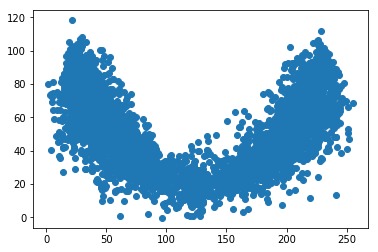

In [13]:
HRs = MiLB[MiLB.next_event_type == "home_run"]
plt.scatter(HRs.hc_x, HRs.hc_y)

,hc_x,hc_y,next_event_type,event_and_next_event_type,event_description,batter_name,pitcher_name,outs,balls,strikes,...,is_hit_into_play,is_hit_into_play_basehit,bat_side,pitch_hand,sport_id,game_pk,at_bat_number,event_inning,top_inning_sw,game_date
0,143.47,176.86,field_out,field_out,Gavin Lux grounds out to first baseman Chris C...,Gavin Lux,Johan Oviedo,0,0.0,1.0,...,1,0,L,R,12,584423,17,3,Y,5/21/2019
1,74.36,96.92,single,single,Richy Pedroza singles on a line drive to left ...,Richy Pedroza,Juan Antonio Pena,0,1.0,0.0,...,1,1,R,L,11,587831,25,3,N,5/21/2019
2,198.40,130.50,field_out,field_out,Marcus Chiu flies out to right fielder Luis Al...,Marcus Chiu,Jayson McKinley,1,3.0,2.0,...,1,0,R,R,13,576707,45,6,N,5/21/2019
3,129.21,190.65,field_out,field_out,"Luken Baker grounds out softly, catcher Brady ...",Luken Baker,Tarik Skubal,0,1.0,2.0,...,1,0,R,L,13,572930,44,7,Y,5/21/2019
4,108.64,157.51,field_out,field_out,"Jeter Downs grounds out, shortstop Jancarlos C...",Jeter Downs,Jayson McKinley,0,1.0,2.0,...,1,0,R,R,13,576707,44,6,N,5/21/2019
5,105.34,170.79,field_out,field_out,"Edson Garcia grounds out, third baseman Issmae...",Edson Garcia,Juan Antonio Pena,2,0.0,1.0,...,1,0,R,L,11,587831,19,2,N,5/21/2019
6,108.69,156.80,field_out,field_out,Brady Whalen lines out to shortstop Yeison Coc...,Brady Whalen,Wilfred Salaman,1,0.0,0.0,...,1,0,R,L,14,577742,60,8,Y,5/21/2019
7,NaN,NaN,NaN,strikeout,Ryne Ogren strikes out swinging.,Ryne Ogren,Dominic Pipkin,1,3.0,2.0,...,0,0,R,R,14,573594,57,7,N,5/21/2019
8,NaN,NaN,NaN,strikeout,Eric Peterson called out on strikes.,Eric Peterson,Jayson McKinley,0,1.0,2.0,...,0,0,R,R,13,576707,54,7,N,5/21/2019
9,113.29,23.04,double,double,Richy Pedroza hits a ground-rule double (8) on...,Richy Pedroza,Juan Antonio Pena,1,2.0,1.0,...,1,1,R,L,11,587831,7,1,N,5/21/2019
